In [7]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.integrate import quad, fixed_quad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'large'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'large'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'large'
pl.rcParams['ytick.direction']  = 'in'

In [8]:
# EVERYTHING IS 1 units

#constants
e        = 1.     #electron charge
m        = 1.     #electron mass
c        = 1.     #speed of light
epsilon0 = 1.     #permittivity of free space
epsilon  = -1.    #sign of electron charge

#parameters
B     = 1.         #background B strength
n_e   = 1.         #electron number density cm^-3
w_T   = 1.        #dimensionless electron temp. k_B T / m c^2
theta = np.pi / 3. #observer angle

#derived quantities
omega_p = np.sqrt(n_e * e**2. / (m * epsilon0))     # plasma frequency    (=1 in these units)
omega_c = e * B / (m * c)                           # cyclotron frequency (=1 in these units)

In [9]:
def K_12_integrand(v_perp, v_z, tau, omega):
    minus_sign= -1. #why do we have this in this version but not the semianalytic one?
    prefactor = 2. * 1j * omega_p**2. / (w_T**5. * np.sqrt(np.pi) * omega)
    k_perp    = omega / c * np.sin(theta)                  # wavevector perp component n = 1 approximation
    k_z       = omega / c * np.cos(theta)                  # wavevector parallel comp. n = 1 approximation
    a         = omega - k_z * v_z
    term1     = v_perp**3. * np.exp(-(v_perp**2. + v_z**2.)/w_T**2.)
    term2     = np.exp(1j*a*tau) * np.sin(epsilon * omega_c * tau)
    term3     = special.j0(2. * k_perp * v_perp / (epsilon * omega_c) * np.sin(epsilon * omega_c * tau / 2.))
    ans       = prefactor * term1 * term2 * term3
    return minus_sign * ans

In [14]:
def K_12_perp_integrated(v_z, tau, omega):
#    real_integral_result = quad(lambda v_perp: K_12_integrand(v_perp, v_z, tau, omega).real, 0., np.inf)
#    imag_integral_result = quad(lambda v_perp: K_12_integrand(v_perp, v_z, tau, omega).imag, 0., np.inf)
    real_integral_result = fixed_quad(lambda v_perp: K_12_integrand(v_perp, v_z, tau, omega).real, 0., 20., 
                                     n=25) #huge speed improvement
    imag_integral_result = fixed_quad(lambda v_perp: K_12_integrand(v_perp, v_z, tau, omega).imag, 0., 20., 
                                     n=25) #huge speed improvement
    ans = real_integral_result[0] + imag_integral_result[0] * 1j
    return ans

In [15]:
def K_12_v_integrated(tau, omega):
    real_integral_result = quad(lambda v_z: K_12_perp_integrated(v_z, tau, omega).real, -np.inf, np.inf)
    imag_integral_result = quad(lambda v_z: K_12_perp_integrated(v_z, tau, omega).imag, -np.inf, np.inf)
    ans = real_integral_result[0] + imag_integral_result[0] * 1j
    return ans

In [16]:
def K_12(omega):
    real_integral_result = quad(lambda tau: K_12_v_integrated(tau, omega).real, 0., 20.) #setting upper bound
    imag_integral_result = quad(lambda tau: K_12_v_integrated(tau, omega).imag, 0., 20.) #by hand at the moment
    ans = real_integral_result[0] + imag_integral_result[0] * 1j
    return ans

In [19]:
print K_12(1.)

(-0.825075157898+0.298471743251j)


In [ ]:
(-0.825137915329+0.298453500169j)

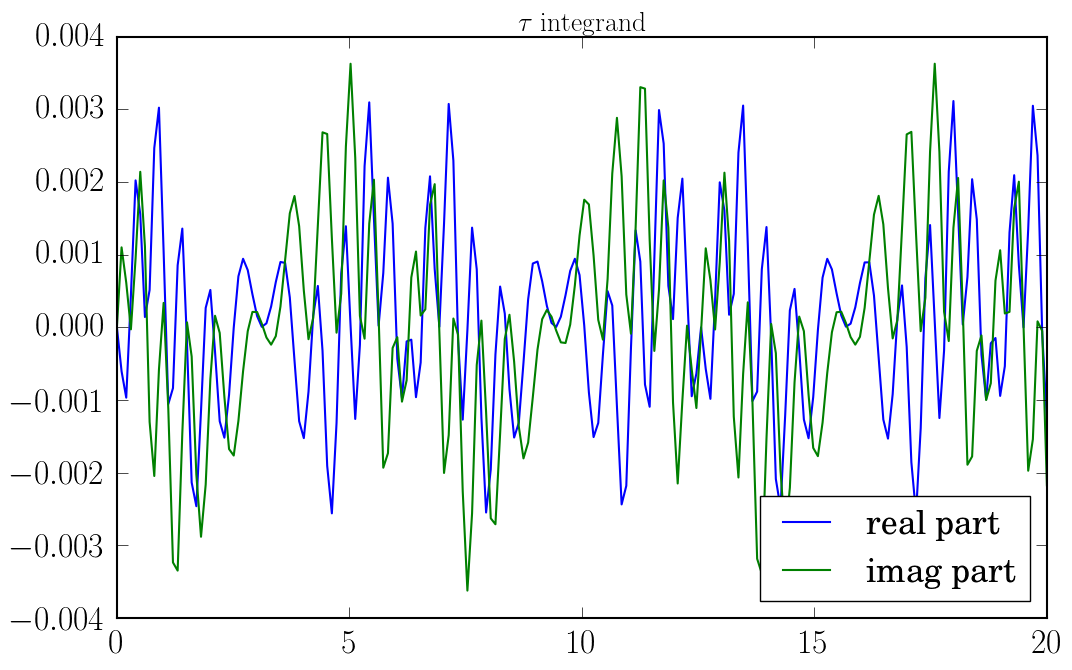

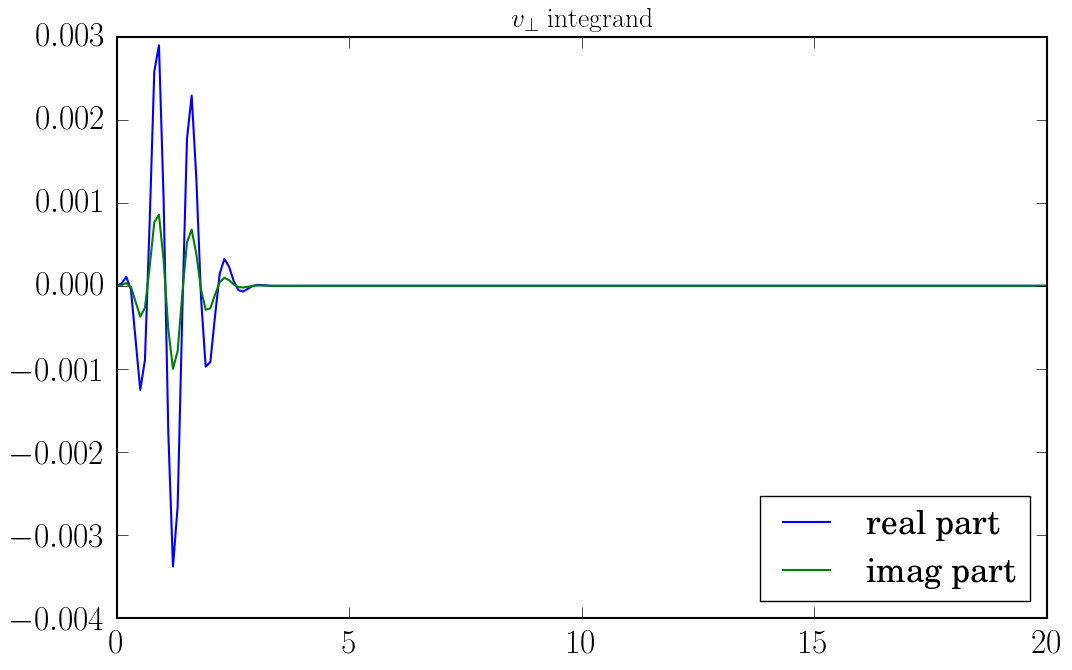

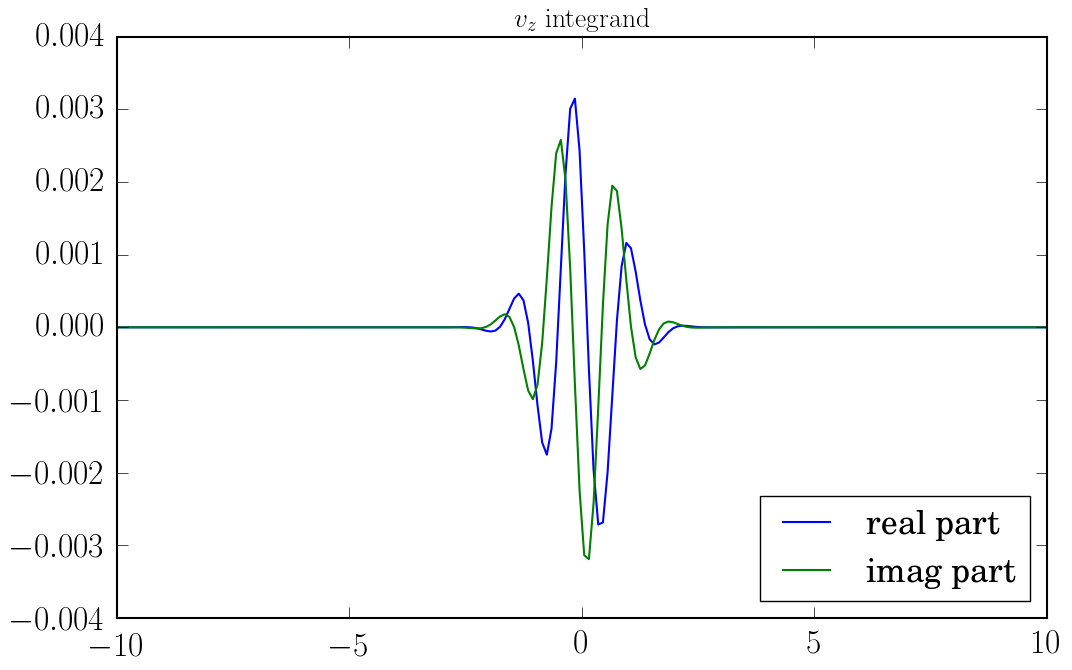

In [20]:
#tau integrand plot
v_perp = 1.
v_z = 1.
omega = 10
tau = np.linspace(0., 20., 200)

pl.title('$\\tau \\mathrm{~integrand}$')
pl.plot(tau, K_12_integrand(v_perp, v_z, tau, omega).real, label='real part')
pl.plot(tau, K_12_integrand(v_perp, v_z, tau, omega).imag, label='imag part')
pl.legend(loc='lower right')
pl.show()

#v_perp integrand plot
v_perp = np.linspace(0., 20., 200)
v_z = 1.
#omega = 1.
tau = 1.

pl.title('$v_\\perp \\mathrm{~integrand}$')
pl.plot(v_perp, K_12_integrand(v_perp, v_z, tau, omega).real, label='real part')
pl.plot(v_perp, K_12_integrand(v_perp, v_z, tau, omega).imag, label='imag part')
pl.legend(loc='lower right')
pl.show()

#v_z integrand plot
v_perp = 1.
v_z = np.linspace(-10., 10., 200)
#omega = 1.
tau = 1.

pl.title('$v_z \\mathrm{~integrand}$')
pl.plot(v_z, K_12_integrand(v_perp, v_z, tau, omega).real, label='real part')
pl.plot(v_z, K_12_integrand(v_perp, v_z, tau, omega).imag, label='imag part')
pl.legend(loc='lower right')
pl.show()


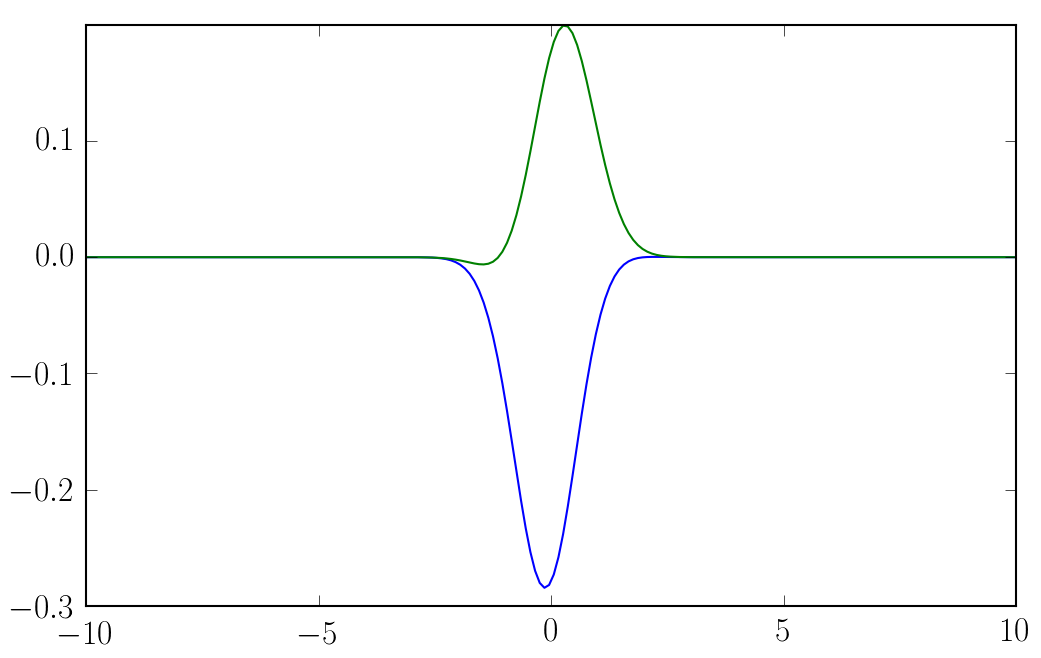

In [42]:
v_z = np.linspace(-10., 10., 200)
tau = 1.
omega = 1.

pl.plot(v_z, np.vectorize(K_12_perp_integrated)(v_z, tau, omega).real)
pl.plot(v_z, np.vectorize(K_12_perp_integrated)(v_z, tau, omega).imag)

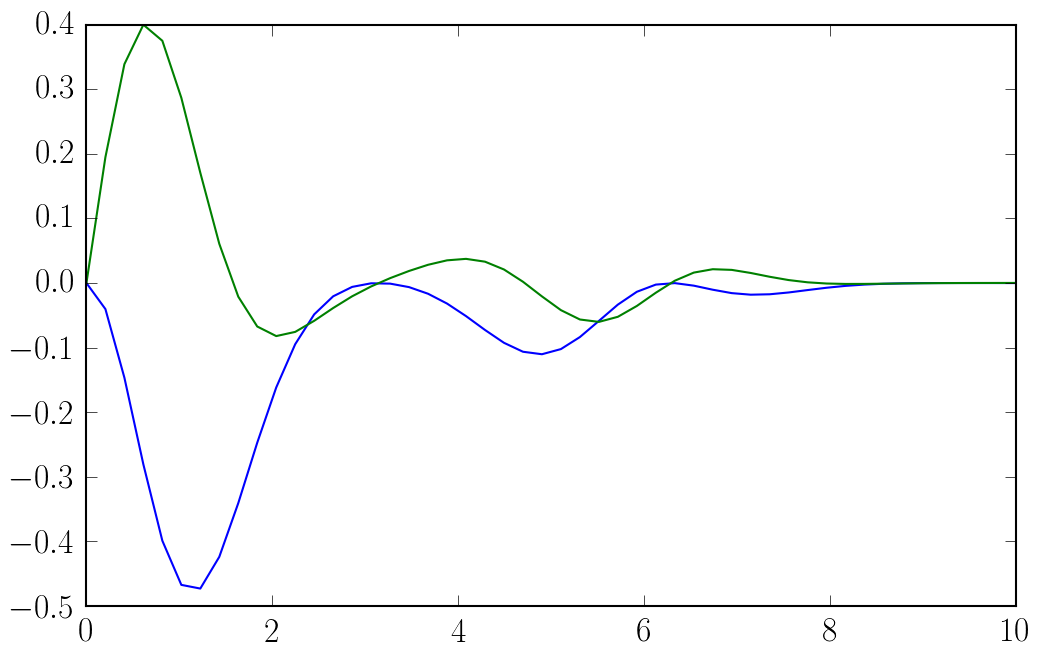

In [44]:
tau   = np.linspace(0., 10., 50)
omega = 1.

pl.plot(tau, np.vectorize(K_12_v_integrated)(tau, omega).real)
pl.plot(tau, np.vectorize(K_12_v_integrated)(tau, omega).imag)